Make sure to clearly read all the instructions in the Project Instructions word doc. Good luck!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import r2_score

df = pd.read_csv('https://www.dropbox.com/s/17mfhd6s4xc3cmk/Diamond%20Price%20Prediction.csv?dl=1')
df.tail(10)

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
53930,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53931,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53932,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47
53933,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
53934,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


# **Customer Questions**

## **#1**

*1.	A potential customer is curious what the diamond prices are like at your store. Specifically, they are curious what the average diamond price is, the range of prices and how spread out the prices are. What information and insight can you provide this potential customer?*

**Answer:**
The average price across all of our diamonds is $3932.80.

The least expensive diamond is $326.00.

The most expensive diamond is $18823.00.

This represents a range in prices of $18497.

One measure of spread or variance is the standard deviation, which is 3,989.44.

However, the interquartile range is only $4374.25 (Q3 = 5324.25; Q1 = 950.00)


The average price across all of our diamonds is $3932.80.
The least expensive diamond is $326.00.
The most expensive diamond is $18823.00.
This represents a range in prices of $18497.
However, the interquartile range is only $4374.25 (5324.25 - 950.0)
The standard deviation is 3989.44




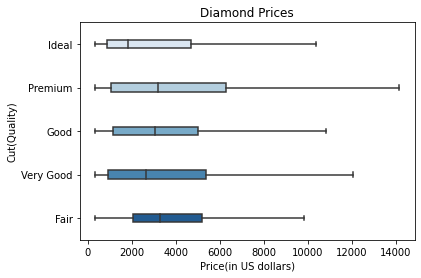

In [ ]:
average_price = round(df['Price(in US dollars)'].mean(),2)
min_price = round(df['Price(in US dollars)'].min(),2)
max_price = round(df['Price(in US dollars)'].max(),2)
q1_std_dev = round(df['Price(in US dollars)'].std(),2)
q3, q1 = np.percentile(df['Price(in US dollars)'], [75, 25])
price_IQR = q3 - q1

print(f'The average price across all of our diamonds is ${average_price}0.\nThe least expensive diamond is ${min_price}.00.\nThe most expensive diamond is ${max_price}.00.\nThis represents a range in prices of ${max_price - min_price}.')
print(f'However, the interquartile range is only ${price_IQR} ({q3} - {q1})')
print(f'The standard deviation is {q1_std_dev}\n\n')



plt.title('Diamond Prices')
sns.boxplot(x=df['Price(in US dollars)'], y=df['Cut(Quality)'], palette="Blues", width=0.2, showfliers=False)

## **#2**

*2.	A customer has a very specific diamond in mind. He wants a diamond with a cut of at least a ‘very good’ rating and a clarity of ‘IF’. The diamond can either have a color of D or E. The customer doesn’t care about the other diamond features. What is the average price of diamonds sold that fit the customer’s criteria when the color is a D?  What is the average price of diamonds sold that fit the customer’s criteria when the color is a E? What insights can you provide the customer?*

*Show an appropriate visualization that shows the spread of diamond prices for each group of diamonds the customer is curious about.*

*Group 1: At least a ‘Very Good’ rating, clarity of ‘IF’ and a color of ‘D’.*

*Group 2: At least a ‘Very Good’ rating, clarity of ‘IF’, and a color of ‘E.*

*Show both visualizations on the same image. Also include on the image as text the average diamond price for each group.*

**Answer:**

Average Price for diamonds meeting the above criteria:
  
  Color D: $8,382.07

  Color E: $3,798.33

However, Color E has a number of outliers skewing the average price higher as can be seen in the boxplots below; if the customer does not feel a strong preference towards Color D, the s/he may be able to buy a better diamond of Color E.



The average price for diamonds of at least a very good cut quality, a clarity rating of IF, and color D is $8382.07

The average price for diamonds of at least a very good cut quality, a clarity rating of IF, and color E is $3798.33



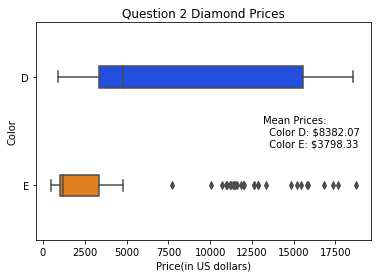

In [ ]:
q2_df = df[((df['Cut(Quality)'] == 'Very Good') | (df['Cut(Quality)'] == 'Premium') | (df['Cut(Quality)'] == 'Ideal')) &
           ((df['Clarity'] == 'IF')) &
           ((df['Color'] == 'D') | (df['Color'] == 'E'))
           ]

q2_df.head(10)

color_d_avg_price = str(round(q2_df[(q2_df['Color'] == 'D')]['Price(in US dollars)'].mean(),2))
color_e_avg_price = str(round(q2_df[(q2_df['Color'] == 'E')]['Price(in US dollars)'].mean(),2))

print(f'The average price for diamonds of at least a very good cut quality, a clarity rating of IF, and color D is ${color_d_avg_price}\n')
print(f'The average price for diamonds of at least a very good cut quality, a clarity rating of IF, and color E is ${color_e_avg_price}\n')

text = 'Mean Prices:\n  Color D: $' + color_d_avg_price + '\n  Color E: $' + color_e_avg_price

plt.title('Question 2 Diamond Prices')
plt.text(.65,.45, text, fontsize=10, transform=plt.gcf().transFigure)
sns.boxplot(x=q2_df['Price(in US dollars)'], y=q2_df['Color'], palette="bright", width=0.2, order=['D', 'E'],showfliers=True)

## **#3**

*3.	A customer is deciding between getting a diamond with a premium cut and a diamond with a very good cut. Is there a statistically significant difference in average prices between premium cut diamonds sold and very good cut diamonds sold? What information can you offer this customer?*

*Generate an appropriate visualization for the customer that clearly shows the price of diamonds for premium cut diamonds and the price of diamonds for very good cut diamonds in one image. Set the hue to the diamonds color. What color of diamond, on average, is the most expensive for Premium cut diamonds? What color of diamond, on average, is the most expensive of Very Good cut diamonds? What insight can you provide the customer?*


**Answer:**

**Based on the T-Test below, there is a statistically significant difference in average prices between premium cut diamonds sold and very good cut diamonds sold because |t| > 1.96 and the p-value is < 0.05 (t = 11.619). This indicates that diamonds with a premium cut quality will tend to be more expensive those with only a very good cut quality.**

What color of diamond, on average, is the most expensive for Premium cut diamonds?

**Color E is, on average, the most expensive among diamonds of a premium cut quality.**

What color of diamond, on average, is the most expensive of Very Good cut diamonds?

**Color I is, on average, the most expensive among diamonds of a very good cut quality.**

What insight can you provide the customer?

**The average price for diamonds of either of the two best colors (I and J) tends to be higher for diamonds of a premium cut than diamonds of a very good cut quality; however, the prices tend to be fairly close for both colors in diamonds of a very good cut quality with the second-to-best color slightly more expensive on average among our diamonds of a very good cut (likely due to confounding variables). If the customer does not feel strongly about the cut quality but feels strongly about the color, I would advise the customer to purchase a very good cut quality diamond as that will provide him or her the most value.**

t: 11.619
p: 0.0


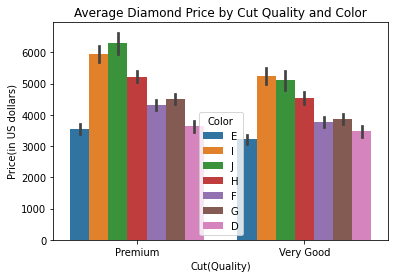

In [ ]:
prem_df = df[df['Cut(Quality)'] == 'Premium']
vg_df = df[df['Cut(Quality)'] == 'Very Good']

t, p = stats.ttest_ind(prem_df['Price(in US dollars)'], vg_df['Price(in US dollars)'])
text_q3 = "t: " + str(round(t,3)) + "\np: " + str(round(p,3))
print(text_q3)

q3_df = df[(df['Cut(Quality)'] == 'Premium') | (df['Cut(Quality)'] == 'Very Good')] 

sns.barplot(x = 'Cut(Quality)', y = 'Price(in US dollars)', hue = 'Color', data = q3_df)

plt.title('Average Diamond Price by Cut Quality and Color')
plt.show()

# **Manager Questions**

## **#4**

*4.	Your manager wants to know what the **highest** quality cut diamond is you have sold and what quality cut of diamond you sell the **most**. The manager also wants to know the **most common type of clarity diamonds** you have sold and the **most common type of color diamonds you have sold**. What does this information say about the type of diamonds you sell (i.e., are they high, moderate, or low quality in terms of cut, color, and clarity)? What information and insight can you provide your manager?*

**Answer:**

**Highest Quality Cut Diamond Sold: Ideal**

**Most Common Quality of Diamond Sold: Ideal (Count = 21,551)**

**Most Common Clarity of Diamond Sold: The most common clarity of diamond is SI1 (count = 13,065) which is the third-to-worst clarity.**

**Most Common Type of Color Diamonds Sold: The most common color is G.**

**This information tells us that the quality of diamonds sold tends to vary by qualitative factor. In terms of cut quality, there tend to be many sales of the highest cut quality (ideal), whereas clarity tends to be worse than average and the most common color would be more of an average color.**

**A couple of insights I gleaned from the information are that customers likely place more emphasis on cut quality than color and clarity. It's possible that cut quality has a bigger impact on the diamond's price than color and clarity when holding karat and other attributes equal.**

In [ ]:
df.groupby('Cut(Quality)').count().sort_values('Color', ascending = False)

,Carat(Weight of Daimond),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
Cut(Quality),,,,,,,,,
Ideal,21551,21551,21551,21551,21551,21551,21551,21551,21551
Premium,13791,13791,13791,13791,13791,13791,13791,13791,13791
Very Good,12082,12082,12082,12082,12082,12082,12082,12082,12082
Good,4906,4906,4906,4906,4906,4906,4906,4906,4906
Fair,1610,1610,1610,1610,1610,1610,1610,1610,1610


In [ ]:
df.groupby('Clarity').count().sort_values('Color', ascending = False)

,Carat(Weight of Daimond),Cut(Quality),Color,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
Clarity,,,,,,,,,
SI1,13065,13065,13065,13065,13065,13065,13065,13065,13065
VS2,12258,12258,12258,12258,12258,12258,12258,12258,12258
SI2,9194,9194,9194,9194,9194,9194,9194,9194,9194
VS1,8171,8171,8171,8171,8171,8171,8171,8171,8171
VVS2,5066,5066,5066,5066,5066,5066,5066,5066,5066
VVS1,3655,3655,3655,3655,3655,3655,3655,3655,3655
IF,1790,1790,1790,1790,1790,1790,1790,1790,1790
I1,741,741,741,741,741,741,741,741,741


In [ ]:
df.groupby('Color').count().sort_values('Clarity', ascending = False)

,Carat(Weight of Daimond),Cut(Quality),Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
Color,,,,,,,,,
G,11292,11292,11292,11292,11292,11292,11292,11292,11292
E,9797,9797,9797,9797,9797,9797,9797,9797,9797
F,9542,9542,9542,9542,9542,9542,9542,9542,9542
H,8304,8304,8304,8304,8304,8304,8304,8304,8304
D,6775,6775,6775,6775,6775,6775,6775,6775,6775
I,5422,5422,5422,5422,5422,5422,5422,5422,5422
J,2808,2808,2808,2808,2808,2808,2808,2808,2808


## **#5**

*5.	Your manager wants to know what the **relationship is between the weight of the diamond (carat) and the price of the diamond.** Generate the **appropriate visualization** that shows that relationship. Include the linear regression line. What is the measure of strength between the two variables and is it statistically significant? How much of the variance in price can be explained by the diamond’s carat? What is the average price of diamonds sold? What insight can you provide your manager?*

**Answer:**
The correlation coefficient (r) is 0.922, indicating a strong, positive correlation between the two variables.

The coefficient of determination (r^2) is 0.849, indicating that about 85% of the difference in a diamond's price can be explained by the difference in a diamond's weight as measured in karats.

The p-value is less than 0.05, indicating the results of the regression are statistically significant.

The regression equation provides a model for predicting price based on karat, where--on average--an increase of one karat would lead to a $7,756 increase in price.

The average price of diamonds sold is $3,932.80.

If we were to consider only one variable in predicting a diamond's price, karat performs fairly well. However, the best-fit line does poorly in estimating the price of diamonds around one karat in weight; my hypothesis is that this is a fairly common weight of diamonds and that introducing other variables such as cut quality and color could explain more of the variation in pricing. This is something I will explore in question 10.



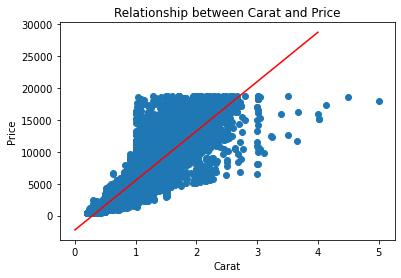

The average price of the diamonds in this dataset is 3932.799721913237
r: 0.9216
p-value:0.0
r2:0.8493
y = 7756.426 * x + -2256.361


In [ ]:
q5_df = df

plt.scatter(q5_df['Carat(Weight of Daimond)'] ,q5_df['Price(in US dollars)'])

plt.xlabel('Carat')

plt.ylabel('Price')

plt.title('Relationship between Carat and Price')


corr = stats.pearsonr(q5_df['Carat(Weight of Daimond)'] ,q5_df['Price(in US dollars)'])
model = np.polyfit(q5_df['Carat(Weight of Daimond)'] ,q5_df['Price(in US dollars)'], 1)
predict = np.poly1d(model)
r2 = r2_score(q5_df['Price(in US dollars)'], predict(q5_df['Carat(Weight of Daimond)']))

q5_df['Carat(Weight of Diamond)'] = q5_df['Carat(Weight of Daimond)'].astype(int)

x_lin_reg = range(0,q5_df['Carat(Weight of Diamond)'].max())
y_lin_reg = predict(x_lin_reg)
plt.plot(x_lin_reg, y_lin_reg, c = 'r')
plt.show()

mean_price = str(q5_df['Price(in US dollars)'].mean())
print('The average price of the diamonds in this dataset is ' + mean_price)
print('r: ' + str(round(corr[0], 4))) 
print('p-value:' + str(round(corr[1], 6)))
print('r2:' + str(round(r2,4)))
print('y = ' + str(round(model[0],3)) + ' * x + ' + str(round(model[1],3)))


## **#6**

*6.	Your manager is curious about a very specific group of diamonds: Cut = Ideal; Clarity = SI1, Color = G. Using this group of the diamond, create an **appropriate visualization** that shows the relationship between the weight of the diamond (carat) and the diamond’s price. Generate the appropriate visualization that shows that relationship. Include the linear regression line. What is the measure of strength between the two variables and is it statistically significant? What is the average price of diamonds sold for this specific group of diamonds? How much of the variance in price can be explained by the diamond’s carat?* 

*Using insights you’ve gained from previous questions, what **additional insights** can you provide your manager?*


**Answer:**

The correlation coefficient (r) is 0.9675, indicating a strong, positive correlation between the two variables.

The coefficient of determination (r^2) is 0.936, indicating that about 94% of the difference in a diamond's price can be explained by the difference in a diamond's weight as measured in karats.

The p-value is less than 0.05, indicating the results of the regression are statistically significant.

The regression equation provides a model for predicting price based on karat, where--on average--an increase of one karat would lead to a $8,396.40 increase in price.

The average price of diamonds sold fitting the specified criteria is $3,441.11.

When controlling for the other three variables (Cut Quality, Clarity, and Color), karat much more accurately predicts the sales price. This suggests that these three variables were creating noise in the prior regression analysis. 

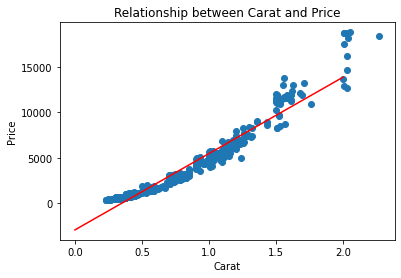

The diamonds represented in this dataset are of an Ideal cut, a clarity measure of SI1, and color G.
The average price of the diamonds that fit these criteria is $3441.11
r: 0.9675
p-value:0.0
r2:0.936
y = 8396.403 * x + -2942.322


In [ ]:
q6_df = df[(df['Cut(Quality)'] == 'Ideal') & (df['Clarity'] == 'SI1') & (df['Color'] == 'G')]

plt.scatter(q6_df['Carat(Weight of Daimond)'] ,q6_df['Price(in US dollars)'])

plt.xlabel('Carat')

plt.ylabel('Price')

plt.title('Relationship between Carat and Price')

corr = stats.pearsonr(q6_df['Carat(Weight of Daimond)'] ,q6_df['Price(in US dollars)'])
model = np.polyfit(q6_df['Carat(Weight of Daimond)'] ,q6_df['Price(in US dollars)'], 1)
predict = np.poly1d(model)
r2 = r2_score(q6_df['Price(in US dollars)'], predict(q6_df['Carat(Weight of Daimond)']))

#q6_df['Carat(Weight of Diamond)'] = q6_df['Carat(Weight of Daimond)'].astype(int)

x_lin_reg_q6 = range(0,3)
y_lin_reg_q6 = predict(x_lin_reg_q6)
plt.plot(x_lin_reg_q6, y_lin_reg_q6, c = 'r')
plt.show()

mean_price = str(round(q6_df['Price(in US dollars)'].mean(),2))
print('The diamonds represented in this dataset are of an Ideal cut, a clarity measure of SI1, and color G.')
print('The average price of the diamonds that fit these criteria is $' + mean_price)
print('r: ' + str(round(corr[0], 4))) 
print('p-value:' + str(round(corr[1], 6)))
print('r2:' + str(round(r2,4)))
print('y = ' + str(round(model[0],3)) + ' * x + ' + str(round(model[1],3)))

In [ ]:
df.drop('Carat(Weight of Diamond)',axis=1, inplace=True)

# **Sourcing Team Questions**

## **#7**

*7.	The sourcing team is responsible for finding diamonds for your company to sell. They want to know what feature(s) they should focus on that are strongly related to the price. With price in mind, which of the feature(s) should the sourcing team focus on when finding diamonds for your company to sell? Why? What factors aren’t as important to focus on? Why?*

**Answer:**

If we are simply looking to maximize price with no thought for demand, then the following variables are most positively correlated with price with statistical significance:

Carat (most positively correlated): 0.92
X(length): 0.88
Y(width): 0.87
Z(Depth): 0.86
Table: 0.13
Depth (least correlated and negative): -0.011

Of the quantitative variables, carat is unsurprisingly the most positively correlated with price. nearly as closely correlated are the dimensions of the diamond (X, Y, and Z in descending order. This is also unsurprising given the strong correlation between carat and price because the combined dimensions of a pure diamond are directly correlated with the weight of said diamond. The variables of lesser importance are Table (width of the top of the diamond) and Depth (depth as a percentage of x and y). These are not as closely related to carat due to the many styles of cuts.

Our sourcing department should focus primarily on carat, with the x dimension being marginally more impactful to price than the y and z dimensions.

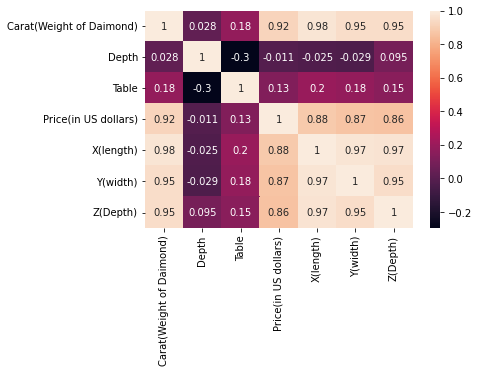

In [ ]:

correlation_mat = df.corr()

sns.heatmap(correlation_mat, annot = True)

## **#8**

*8.	The sourcing team notices that there is a shortage of diamonds with a color “E”. As they are searching for diamonds with a color “E” to buy for your company to sell, they want to know if there is a statistically significant difference in average prices between diamond cuts that have a color of E. What information can you offer the sourcing team? Explain the ‘why’ behind this information.*

**Answer:**
According to the ANOVA below, there is a statistically significant difference in average prices between diamond cuts that have a color of E. The p-value is less than 0.05 and the effect size is 37.1 which indicates that cut quality has a fairly large impact on the price of the diamond. This makes sense because, when controlling for other variables (such as color), a diamond of a better cut quality is more valuable.

In [ ]:
q8_df = df[df['Color']=='E']

groups = q8_df['Cut(Quality)'].unique()  #Filter to all the unique regions (northwest, southeast, northwest, southwest)
group_labels = []               #Create an empty list that will be a two-dimensional list of lists to store the label values associated with each category 
for g in groups:                #Loop through each unique region
  group_labels.append(q8_df[q8_df['Cut(Quality)'] == g]['Price(in US dollars)'])  #add to the group_labels list the charges for that region
f, p =  stats.f_oneway(*group_labels) #perform a one way anova on all the regions. *group_labels is a shortcut way of listing out each of the regions. 

print('F: ' + str(round(f, 4)))
print('p: ' + str(round(p, 4)))

F: 37.0995
p: 0.0


## **#9**

*9.	Building off question 8, the sourcing teams now wants to know what diamond cuts prices are different from each other when the color is E. Perform a post hoc test to determine which diamond cuts average prices are different from each other. What information can you offer the sourcing team? Explain the ‘why’ behind this information.*

**Answer:**
The Tukey Test below refines the analysis in question 8 by comparing the average price difference of the various cut qualities of diamonds fitting color E. The "null hypothesis" is that there is no difference in average price between the cut qualities. The results indicate that the null hypothesis is rejected in 5 comparisons, meaning there exists a statistically significant difference between the average prices in 5 of the 10 comparisons:

**Comparison --- Mean Difference in Price**

1. Fair vs. Ideal --- $1084.76

  i.e. Ideal cut is on average ~$1,085 more expensive than Fair cut

2. Good vs. Ideal --- $826.09

3. Premium vs. Ideal --- $941.36

4. Very Good vs. Ideal --- $617.10

5. Very Good vs. Premium --- $324.26

This makes sense because we have controlled for one variable (color) and found that more premium cuts generally command higher prices. However, we have not controlled for other confounding variables such as carat. If we were to control for other variables, we would likely find that more than 5 of the 10 comparisons would be statistically significant with higher cuts commanding higher prices.

In [ ]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

q9_df = df[df['Color']=='E']

tukey = pairwise_tukeyhsd(endog=q9_df['Price(in US dollars)'],
                          groups=q9_df['Cut(Quality)'],
                          alpha=0.05)

print(tukey)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1   group2   meandiff  p-adj    lower      upper   reject
---------------------------------------------------------------
   Fair      Good  -258.6683  0.811  -932.5712  415.2345  False
   Fair     Ideal -1084.7624  0.001 -1707.0475 -462.4773   True
   Fair   Premium  -143.3981    0.9  -776.8984  490.1023  False
   Fair Very Good  -467.6604 0.2581 -1100.4331  165.1123  False
   Good     Ideal  -826.0941  0.001 -1156.1583 -496.0298   True
   Good   Premium   115.2703 0.8965  -235.4809  466.0214  False
   Good Very Good  -208.9921 0.4778  -558.4273  140.4431  False
  Ideal   Premium   941.3643  0.001   704.4676 1178.2611   True
  Ideal Very Good    617.102  0.001   382.1581  852.0459   True
Premium Very Good  -324.2623  0.007  -587.4783  -61.0464   True
---------------------------------------------------------------


In [ ]:
q9_df['Price(in US dollars)'].count()

9797

# **#10**

*10.	Explore the data and offer an additional insight you think would be useful to a customer, the manager or the sourcing team. Show the python code you used to arrive at the insight. Explain why the insight is important and how it can be helpful. If you find an insight using a concept we have covered in class, you will get half points on this question. Assuming you did the rest of the project right, you can still get an ‘A’ on this project while getting half points on this problem. If you use a concept we haven’t learned in this class (i.e., went out to google and learned something), you can get up to full points on this problem. Googling and exploring are some of the most important skills to learn. Points will be given based on the usefulness of your insight, your ability to articulate the importance of the insight, the accuracy of your code, and if you used a new python concept.*

**Answer:**

In Question 5, I wrote the following:

*"If we were to consider only one variable in predicting a diamond's price, karat performs fairly well. However, the best-fit line does poorly in estimating the price of diamonds around one karat in weight; my hypothesis is that this is a fairly common weight of diamonds and that introducing other variables such as cut quality and color could explain more of the variation in pricing.*

Below, I have run a multivariate regression to see which variables could be introduced to improve the accuracy of our model in predicting price. This required converting qualitative variables to quantitative, including cut quality, color, and clarity. In each new variable created, the highest number indicates the highest quality in that given variable

e.g. Ideal is 4; Fair is 0. This means that if Ideal cuts are priced higher than Fair cuts, the correlation coefficient between Price and the new cut quality variable will be positive.

**To run the multivariate regression you will need to install the finance_byu package, for which the code is included in the block below.**

I chose to exclude X, Y, and Z from the analysis since they are closely related to a diamond's carat.

The regression yielded the following equation:

Price = 8783.77 * (Carat) + 155.7 * (Cut Quality) + 319.67 * (Color Quality) + 524.84 * (Clarity Quality) - 6218.338

Each of the four variables is statistically significant (p-values < 0.05). The r-squared is 0.90, meaning that 90% of the variance in price can be explained by the four variables included in the analysis. While there is still 10% that goes unexplained that will create noise, this provides a fairly accurate pricing model.

Because the qualitative variables were converted to integers, the coefficients in the regression formula can be interpreted as the increase in price from going up in quality a single notch. For example, a diamond that is categorized as color I could be expected to be 319.67 dollars more expensive than a diamond categorized as color J, all else equal, whereas a diamond of color H is estimated to be 319.67 dollars more expensive than a diamond of color I.

This model gives both the sourcing team, sales team, and the customer a sense for how much they could expect to pay for a diamond based on different attributes. While it is easy to look at the formula above and think that the diamond's weight is the most impactful variable on price, the other attributes are also significantly impactful. For example, in our dataset the clarity of the diamond is separated into eight different levels. Holding carat, color, and cut quality constant, a customer could expect to pay 3,674 dollars more for a diamond with a clarity of IF versus a clarity of I1 (524.84 dollars * 7 unit increase).

The last block of code includes a user-defined function that accepts user inputs to estimate the price of a diamond based on the regression formula.



In [ ]:
q10_df = df
q10_df.groupby('Cut(Quality)').count()
cq_d = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
color_d = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
clarity_d = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}

q10_df['X'] = q10_df['X(length)']
q10_df['Y'] = q10_df['Y(width)']
q10_df['Z'] = q10_df['Z(Depth)']
q10_df['Carat'] = q10_df['Carat(Weight of Daimond)']
q10_df['Price'] = q10_df['Price(in US dollars)']
q10_df['Colorq'] = q10_df['Color'].map(color_d)
q10_df['Clarityq'] = q10_df['Clarity'].map(clarity_d)
q10_df['Cutq'] = q10_df['Cut(Quality)'].map(cq_d)

q10_df

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth),X,Y,Z,Carat,Price,Colorq,Clarityq,Cutq
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,3.95,3.98,2.43,0.23,326,5,1,4
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3.89,3.84,2.31,0.21,326,5,2,3
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4.05,4.07,2.31,0.23,327,5,4,1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4.20,4.23,2.63,0.29,334,1,3,3
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,4.34,4.35,2.75,0.31,335,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,5.75,5.76,3.50,0.72,2757,6,2,4
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,5.69,5.75,3.61,0.72,2757,6,2,1
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,5.66,5.68,3.56,0.70,2757,6,2,2
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,6.15,6.12,3.74,0.86,2757,2,1,3


In [ ]:
!pip install finance-byu

import statsmodels.formula.api as smf
from finance_byu.summarize import summary
from finance_byu.regtables import Regtable

reg = smf.ols('Price ~ Carat + Cutq + Colorq + Clarityq', data = q10_df).fit()

table = Regtable([reg], stat = 'pvalues', sig = 'coeff')
table.render()

,Price
,
Intercept,-6218.338***
,(0.00)
Carat,8783.772***
,(0.00)
Cutq,155.700***
,(0.00)
Colorq,319.673***
,(0.00)
Clarityq,524.843***


In [ ]:
def diamond_valuation(carat, clarity, cut, color):
  diamond_value = -6218.338 + carat * 8783.772 + clarity * 524.843 + color * 319.673 + cut * 155.7
  return diamond_value

carat = float(input("Enter carats to the nearest hundredth: "))
clarity = float(input("Enter clarity as an integer where I1: 0, SI2: 1, SI1: 2, VS2: 3, VS1: 4, VVS2: 5, VVS1: 6, IF: 7: "))
cut = float(input("Enter cut quality as an integer where Fair: 0, Good: 1, Very Good: 2, Premium: 3, Ideal: 4: "))
color = float(input("Enter color where J: 0, I: 1, H: 2, G: 3, F: 4, E: 5, D: 6: "))

value = diamond_valuation(carat, clarity, cut, color)

print("The estimated price of a diamond based on these inputs is $" + str(round(value,2)))
